In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

In [2]:
from scipy.stats import binom
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import poisson
from scipy.stats import nbinom
import pandas as pd
import sympy as sp
from sympy import *
sp.init_printing()
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from scipy.integrate import quad
import numpy as np
from scipy.misc import derivative
import math
from math import *
from fractions import Fraction
import fractions
from IPython.display import display, Math, Latex
%matplotlib inline
from IPython.display import Image, HTML

## Discrete Distributions
This notebook contains a short recap video of discrete distributions as well as solutions to the exercises. The code is hidden, but if you want to see, well press the "Show code" button. It may take your PC a while to run all cells. Be patient.

The first thing we will recap, is the concept of Bernoulli Trials (BT) or Bernoulli distributions. Please see this video or skip if you feel you already know enough about BTs.

## Binomial Distribution
The first distribution of interest is the binomial. Recall that the pmf is

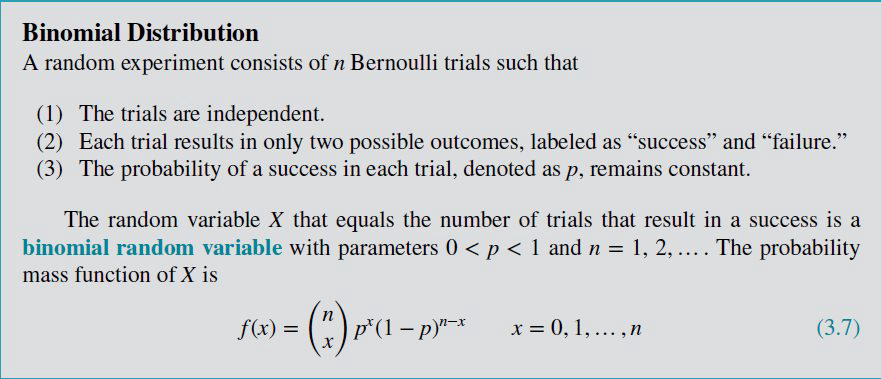

In [4]:
Image('https://cdn.mathpix.com/snip/images/i17xO6WREqsiUvVwkFlynVlnIemWEfbkSX1nLMyuw5c.original.fullsize.png', width = 500)

Many of the exercises are to be solved using the binomial distribution. If you need to recap, watch this video about Binomial or else move on to the solutions of exercises 1 and 2 below.

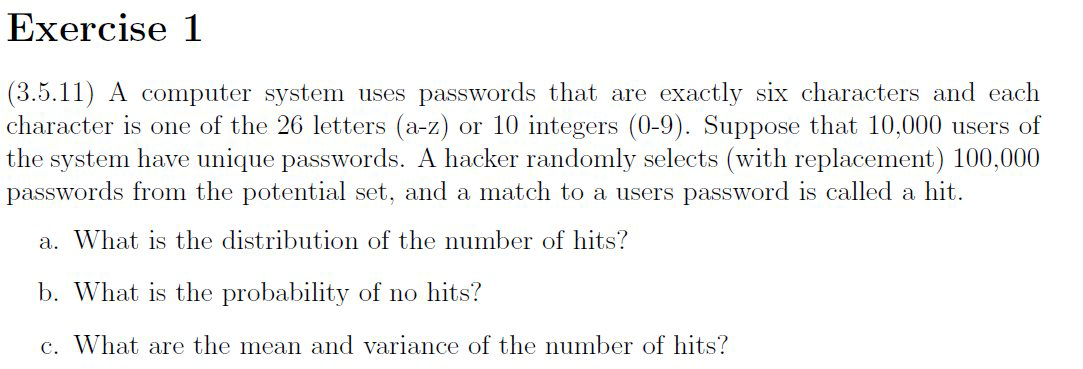

In [6]:
Image('https://cdn.mathpix.com/snip/images/twnuhOj7I7cSCZK-6YKt0pAJh7BMp-ZlbsPb6lJa5VQ.original.fullsize.png', width =500)

### Solution

**a)** Let $X$ denote the number of user passwords selected by the hacker. Then $X$ follows a binomial distribution with $n=10^5$ and $p = \frac{10^4}{36^6}$

In [3]:
n = 10**5
p = (10**4)/(36**6)
p

**b)**

In [8]:
x = 0

prob = binom.pmf(x, n, p)

#print('P(X = 0) = ' + repr(round(prob, 4)))

#display(Math("P(X = 0) = " + repr(round(prob, 4))))

display(Math("P(X = 0) = " + repr(round(binom.pmf(0, n, p), 4))))

<IPython.core.display.Math object>

**c)**

In [9]:
Ex = binom.mean(n, p)
Var = binom.var(n, p)

display(Math("E(X) = " + repr(round(Ex, 4)) + " \quad and \quad Var(X) = " + repr(round(Var, 4))))

<IPython.core.display.Math object>

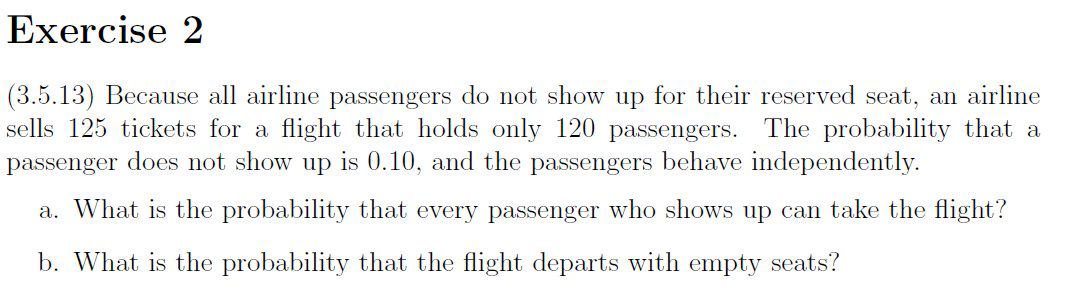

In [10]:
Image('https://cdn.mathpix.com/snip/images/1SNKDlNmRw6w0pFxX_yAfKpF2cbpCzc_2LSVN9qCTts.original.fullsize.png', width =500)

**a)** Let $X$ denote the number of passengers who do not show up. Then $X$ follows a binomial distribution with $n = 125$ and $p = 0.1$

In [11]:
n = 125
p = 0.1

display(Math("P(X \geq 5) = " + repr(round(1-binom.cdf(4, n, p), 4))))
#display(Math("P(X \geq 5) = " + repr(round(binom.sf(4, n, p), 4))))

<IPython.core.display.Math object>

**b)**

In [12]:
display(Math("P(X \geq 6) = " + repr(round(1-binom.cdf(5, n, p), 4))))
#display(Math("P(X \geq 6) = " + repr(round(binom.sf(5, n, p), 4))))

<IPython.core.display.Math object>

## Geometric and Negative Binomial

So remember that the geometric is merely a special case of the negative binomial. First we see the pdf's and then two videos follow about these distributions.

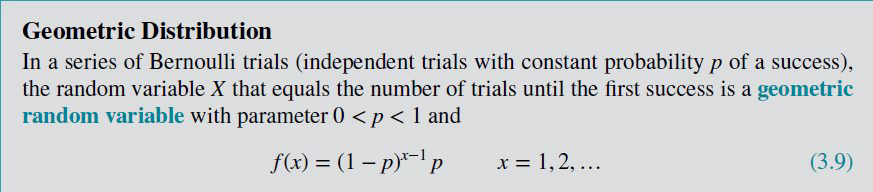

In [13]:
Image('https://cdn.mathpix.com/snip/images/6iOL5ZRpayngzqja1dj_x6QU42SHpfEOoeuWd2f-F8Q.original.fullsize.png', width = 500)


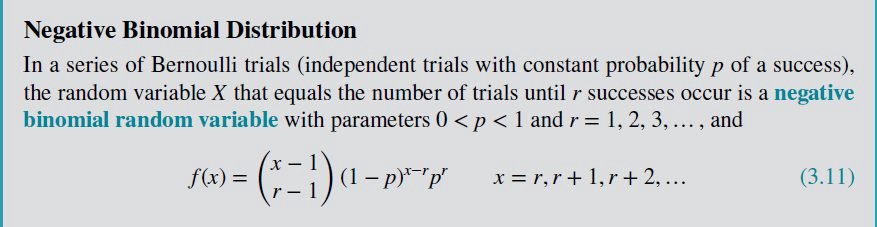

In [15]:
Image('https://cdn.mathpix.com/snip/images/4EdBp-JdsBy8FvJ0ORDuWweMqpNmJX_TraOWC9QISM4.original.fullsize.png', width = 500)

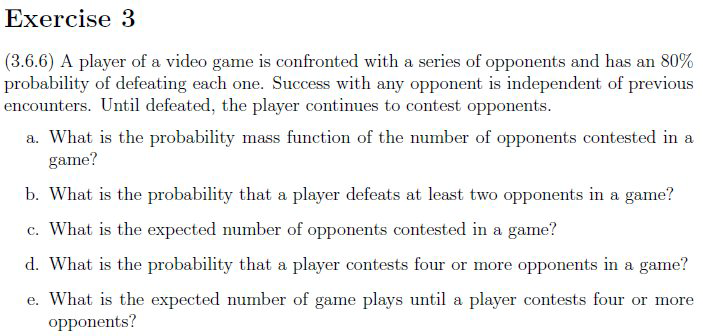

In [17]:
Image('https://cdn.mathpix.com/snip/images/b-CyxSWt9cz-VUmL5YU4ZBsck07KWd6u3csqbUMJpa8.original.fullsize.png', width = 500)

### Solution

**a)** Let $X$ denote the number of opponents until the player is defeated. Then $X$ follows a geometric distribution with $p=0.2$ and the following pmf: 
$f(x) = 0.8^{x-1} \cdot 0.2$

**b)**

In [18]:
p = 0.2
display(Math("P(X > 2) = " + repr(round(1-geom.cdf(2, p), 4))))
#display(Math("P(X > 2) = " + repr(round(geom.sf(2, p), 4))))

<IPython.core.display.Math object>

**c)**

In [19]:
display(Math("E(X) = " + repr(round(geom.mean(p), 4))))

<IPython.core.display.Math object>

**d)**

In [20]:
display(Math("P(X \geq 4) = " + repr(round(geom.sf(3, p), 4))))

<IPython.core.display.Math object>

**e)** Let $Y$ denote the number of game plays until a player contests four or more opponents. Then $Y$ is a geometric RV with the following expected value:

In [21]:
p2 = geom.sf(3, p)
display(Math("E(Y) = " + repr(round(geom.mean(p2), 4))))
display(Latex("So 2 games"))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

## Poisson Distribution
So the next distribution is the Poisson distribution. First the pmf, then video then exercises. Note the pmf is taken from the book. Usually the pmf is simply: $f(x) = P(X=x)=\frac{\lambda^{x} e^{-\lambda}}{x !}$, which is not only easier to understand but also the one which is used in practice.

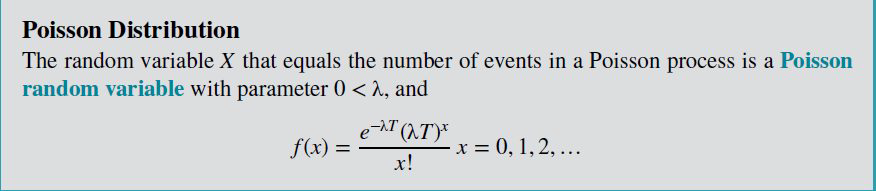

In [22]:
Image('https://cdn.mathpix.com/snip/images/6sZSw573gfcushylEjePgzfCUgAqIwVUlMW6W0LfEyg.original.fullsize.png', width = 500)

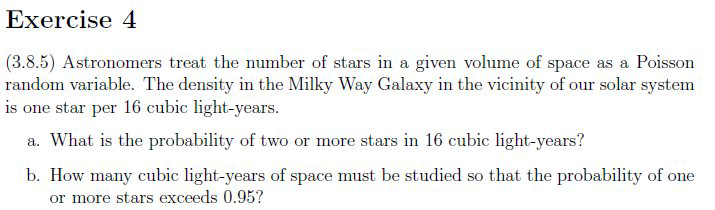

In [24]:
Image('https://cdn.mathpix.com/snip/images/j-yE3WXLEyRcOYwQNRtXHhakDeir-8NN6gtxgIoXSDc.original.fullsize.png', width = 500)

**a)** Let $X$ denote the number stars in 16 cubic light years. Then $X$ is a poisson RV with $\lambda = 1$

In [25]:
l = 1

display(Math("P(X \geq 2) = " + repr(round(poisson.sf(1, l), 4))))

<IPython.core.display.Math object>

**b)**

<!-- This can not be solved in using a method in Python. We need to in some way find the "reverse". We know that the probability of one or more stars has to be greater than 0.95, so we need to find $\lambda$ and then multiply this by 16 cubic light years. Here are the calculations:

$
\begin{align}
P(X\geq1)&>0.95 \\
1-P(X < 1) &> 0.95 \\
1-P(x=0)&>0.95 \\
1-0.95&>P(x=0) \\
0.05&>\frac{\lambda^{0} \cdot e^{-\lambda}}{0 !} \\
0.05&>e^{-\lambda} \\
\ln 0.05&>-\lambda \quad \Rightarrow \lambda>2.99 \approx 3
\end{align}
$

So we get 48 in total. -->

In [2]:
from math import log, e
from sympy import solve, Symbol

l = Symbol('l')
solve(0.05 - e**-l, l)

[2.99573227355399]

None of the exercises contained the Hypergeometric distribution. It often pops up the exam so maybe we'll do some exercises in the online session. Here is a recap of the **Hypergeometric** and a summary of a the discrete distributions.

## Hypergeometric

## Some Example Problems

## An Overview of Distributions

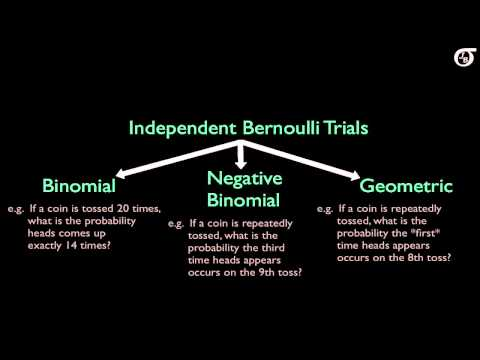

In [30]:
YouTubeVideo('UrOXRvG9oYE', width = 500)

The rest of the exercises are primarily Binomial, one of them being Poisson. Here are just the solutions. If you have any questions, you may ask me at the Q/A.

### Exercise 5
A congested computer network has a 1% chance of losing a data packet that
must be resent, and packet losses are independent events. An e-mail message requires
100 packets.

**a)** What is the distribution of the number of packets in an e-mail message that must be resent? Include the parameter values. Let X denote the number of packages that need to be resent. The X is a binomial RV with n = 100 and p = 0.01

**b)** What is the probability that at least one packet is resent?

In [31]:
n = 100
p = 0.01
display(Math("P(X \geq 1) = " + repr(round(binom.sf(0, n, p), 4))))

<IPython.core.display.Math object>

In [32]:
# c) What is the probability that two or more packets are resent?

display(Math("P(X \geq 2) = " + repr(round(binom.sf(1, n, p), 4))))

<IPython.core.display.Math object>

**d)** What are the mean and standard deviation of the number of packets that are resent?

In [33]:
display(Latex("E(X) = " + repr(round(binom.mean(n,p), 4)) +
              " and $\sigma$ = " + repr(round(binom.std(n,p), 4))))

<IPython.core.display.Latex object>

**e)** If there are 10 messages and each contains 100 packets, what is the probability that at least one message requires that two or more packets be resent?

Let Y denote the number of messages that require two or more packages to be resent. Then Y is a binomial RV with p = 0.26

In [34]:
p2 = binom.sf(1, n, p)
n2 = 10

display(Math("P(Y \geq 1) = " + repr(round(binom.sf(0, n2, p2), 4))))

<IPython.core.display.Math object>

## Exercise 6
A manufacturer of a consumer electronics product expects 2% of units to fail
during the warranty period. A sample of 500 independent units is tracked for warranty
performance.

**a)** What is the probability that none fails during the warranty period?

Let $X$ denote the event that a product fails during warranty. Then $X$ is binomial with

$n = 500$ ,  $p = 0.02$

In [35]:
n = 500
p = 0.02

display(Math("P(X = 0) = " + repr(round(binom.pmf(0, n, p), 4))))

<IPython.core.display.Math object>

**b)** What is the expected number of failures during the warranty period?

In [36]:
display(Math("E(X) = " + repr(round(binom.mean(n, p), 4))))

<IPython.core.display.Math object>

**c)** What is the probability that more than two units fail during the warranty period?

In [37]:
display(Math("P(X > 2) = " + repr(round(binom.sf(2, n, p), 4))))

<IPython.core.display.Math object>

## Exercise 7
The probability that a patient recovers from a rare blood disease is 0.4. If 15 people are
known to have contracted this disease, what is the probability that

**a)** at least 10 survive

Let $X$ denote the number of survivors. Then, $X$ is a binomial random variable with

$n = 15$ , $p = 0.4$

In [38]:
n = 15
p = 0.4

display(Math("P(X \geq 10) = " + repr(round(binom.sf(9, n, p), 4))))

<IPython.core.display.Math object>

**b)** from 3 to 8 survive

In [ ]:
display(Math("P(3 \leq X \leq 8) = " +
             repr(round(binom.cdf(8,n,p) - binom.cdf(2, n, p), 4))))

<IPython.core.display.Math object>

**c)** exactly 5

In [ ]:
display(Math("P(X = 5) = " + repr(round(binom.pmf(5, n, p), 4))))

<IPython.core.display.Math object>

**d)** Find the mean and variance

In [41]:
display(Latex("E(X) = " + repr(binom.mean(n,p)) + " and Var(X) = " +
              repr(round(binom.var(n,p), 4))))

<IPython.core.display.Latex object>

## Exercise 8

**a)** The inspector of the retailer randomly picks 20 items from a shipment. What is the probability that there will be at least one defective item among them?

Let $X$ denote the event that a device is defective. Then $X$ follows a binomial distribution with

$n = 20$ , $p = 0.03$

In [ ]:
n = 20
p = 0.03
display(Math("P(X \geq 1) = " + repr(round(binom.sf(0, n, p), 4))))

<IPython.core.display.Math object>

**b)** Suppose that the retailer receives 10 shipments in a month and
   the inspector randomly tests 20 devices per shipment. What is the
   probability that there will be 3 shipments containing at least one
   defective device?
   
Now, let $Y$ denote the event that a shipment contains at least one defective device. Then $Y$ follows a binomial distribution with p = 0.4562.

In [43]:
p2 = binom.sf(0, n, p)
n2 = 10

display(Math("P(Y = 3) = " + repr(round(binom.pmf(3, n2, p2), 4))))

<IPython.core.display.Math object>

## Assignment 9
High 
flows result in the closure of a causeway. From past records, the road is closed for
this reason on 10 days during a 20-year period. At an adjoining village, there is concern
about the closure of the causeway because it provides the only access. The villagers
assume that the probability of a closure of the road for more than one day during a year
is less than 0.10. Is this correct? Please show using the Poisson distribution.

In [44]:
l = 10/20

display(Math("P(X > 1) = " + repr(round(poisson.sf(1, l), 4))))
display(Latex("Yes, the villagers are correct in their assumption."))

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

## Assignment 10
A company performs inspection on shipments from suppliers in order to detect nonconforming products. Assume a lot contains 1000 items and 1% is nonconforming. Assuming that the number of nonconforming products in the sample is binomial, what sample size is needed so that the probability of choosing at least one nonconforming item in the sample is at least 0.9?

**There is no way to do this in Python. ppf. returns $x$ not $n$.**

$P(X \geq 1) \geq 0.9 \iff 1-P(X = 0) \geq 0.9 \iff 0.1 \geq P(X = 0)$
$0.1 \geq \left(\begin{array}{c}{1000} \\ {0}\end{array}\right) \cdot 0.01^{0} \cdot(1-0.01)^{n} \iff 0.1 \geq 0.99^{n} \iff$
$n \geq \frac{\ln 0.1}{\ln 0.99} \iff n \geq 230$

## Assignment 11
The number of errors in a textbook follows a Poisson distribution with a mean of 0.01
error per page. What is the probability that there are three or less errors in 100 pages?

In [45]:
l = 0.01*100

display(Math("P(X \leq 3) = " + repr(round(poisson.cdf(3, l), 4))))

<IPython.core.display.Math object>